# Web Scraping

In those rare, terrifying moments when I'm without Wi-Fi, I realize just how much of what I do on the computer is really what I do on the Internet. Out of sheer habit I'll find myself trying to check email, read friends' Twitter feeds, or answer the question, "Did Kurtwood Smith have any major roles before he was in the original 1987 Robocop?"

Since so much work on a computer involves going on the Internet, it'd be great if your programs could get online. Web scraping is the term for using a program to download and process content from the Web. For example, Google runs many web scraping programs to index web pages for its search engine. In this chapter, you will learn about several modules that make it easy to scrape web pages in Python.

- webbrowser. Comes with Python and opens a browser to a specific page.
- Requests. Downloads files and web pages from the Internet.
- Beautiful Soup. Parses HTML, the formal that web pages are written in.
- Selenium. Launches and controls a web browser. Selenium is able to fill the forms and simulate mouse clicks in this browser.

# Project: Mapit.Py With The Webbrowser Module

The webbrowser module's open() function can launch a new browser to a specified URL. Enter the following into the interactive shell:

In [1]:
import webbrowser

In [2]:
webbrowser.open('http://inventwithpython.com/')

True

A web browser tab will open to the URL http://inventwithpython.com/. This is about the nly thing the webbrowser module can do. Even so, the open() function does make some interesting things possible. For example, it's tedious to copy a street address to the clipboard and bring up a map of it on Google Maps. You could take a few steps out of this task by writing a simple script to automatically launch the map in your browser using the contents of your clipboard. This way, you only have to copy the address to a clipboard and run the script, and the map will be loaded for you.

This is what your program does:

- Gets a street address from the command line arguments or clipboard.
- Opens the web browser to the Google Maps page for the address.

This means your code will need to do the following:

- Read the command line arguments from sys.argv.
- Read the clipboard contents.
- Call the webbrowser.open() function to open the web browser.

Open a new file editor window and save it as mapIt.py.

# Figure Out The URL

Based on the instructions in Appendix B, set up mapIt.py so that when you run it from the command line, like so...

C:\> mapit 870 Valencia St, San Francisco, CA 94110

... the script will use the command line arguments instead of the clipboard. If there are no command line arguments, then the program will know to use the contents of the clipboard.

First you need to figure out what URL to use for a given street address. When you load http://maps.google.com/ in the browser and search for an address, the URL in the address bar looks something like this:
https://www.google.com/maps/place/870+Valencia+St/@37.7590311,-122.4215096,17z/data=!3m1!4b1!4m2!3m1!1s0x808f7e3dadc07a37:0xc86b0b2bb93b73d8

The address is in the URL, but there's a lot of additional text there as well. Websites often add extra data to URLs to help track visitors or customize sites. But if you try just going to 

https://www.google.com/maps/place/870+Valencia+St+San+Francisco+CA/,
you'll find that it still brings up the correct page. So your program can be set to open a web browser to 'https://www.google.com/maps/place/your_address_string'
(where your_address_string is the address you want to map).

# Step 2: Handle The Command Line Arguments

Make your code look something like this:

In [3]:
#! python3
# mapIt.py - Launches a map in the browser using an address from the
# command line or clipboard.

import webbrowser, sys
if len(sys.argv) > 1:
    # Get address from command line.
    address = ' '.join(sys.argv[1:])

# TODO: Get address from clipboard.

After the program's #! shebang line, you need to import the webbrowser module for launching the browser and import the sys module for reading the potential command line arguments. The sys.argv variable stores a list of the program's filename and command line arguments. If this list has more than just the filename in it, then len(sys.argv) evaluates to an integer greater than 1, meaning that command line arguments have indeed been provided.

Command line arguments are usually separarted by spaces, but in this case, you want to interpret all of the arguments as a single string. Since sys.argv is a list of strings, you can pass it to the join() method, which returns a single string value. You don't want the program name in this string, so instead of sys.argv, you should pass sys.argv[1:] to chop off the first element of the array. The final string that this expression evaluates to is stored in the address variable.

If you run the program by entering this into the command line...

mapit 870 Valencia St, San Francisco, CA 94110

... the sys.argv variable will contain this list value:

['mapIt.py', '870', 'Valencia', 'St, ', 'San', 'Francisco, ', 'CA', '94110']

The address variable will contain the string '870 Valencia St, San Francisco, CA 94110'

# Step 3: Handle The Clipboard Content And Launch The Browser

Make your code look like the following:

In [ ]:
#! python3
# mapIt.py - Launches a map in the browser using an address from the
# command line or clipboard.

import webbrowser, sys, pyperclip
if len(sys.argv) > 1:
    # Get address from command line.
    address = ' '.join(sys.argv[1:])
else:
    # Get address from clipboard.
    address = pyperclip.paste()

webbrowser.open('https://www.google.com/maps/place/' + address)

If there are no command line arguments, the program will assume the address is stored on the clipboard. You can get the clipboard content with pyperclip.paste() and store it in a variable named address. Finally, to launch a web browser with the Google Maps URL, call webbrowser.open().

While some of the programs you write will perform huge tasks that save you hours, it can be just as satisfying to use a program that conveniently saves you a few seconds each time you perform a common task, such as getting a map of an address. Table 11-1 compares the steps needed to display a map with and without mapIt.py:

Table 11-1 Getting a Map with and Without mapIt.py

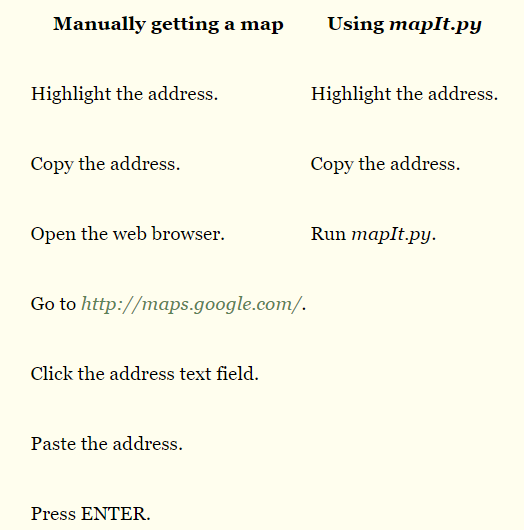

See how mapIt.py makes this task less tedious?

# Ideas For Similar Programs

As long as you have a URL, the webbrowser module lets uses cut out the step of opening the browser and directing themselves to a website. Other programs could use this functionality to do the following:

- Open all links on a page in separate browser tabs.
- Open the browser to the URL for your local weather.
- Open several social network sites that you regularly check.

# Downloading Files From The Web With The Requests Module

The requests module lets you easily download files from the Web without having to worry about complicated issues such as network errors, connection problems, and data compression. The requests module doesn't come with Python, so you'll have to install it first. From the command line, run pip install requests. (Appendix A has additional details on how to install third-party modules.)

The requests module was written because Python's urllib2 module is too complicated to use. If fact, take a permanent market and black out this entire paragraph. Forget I ever mentioned urllib2. If you need to download things from the Web, just use the requests module.

Next, do a simple test to make sure the request module installed itself correctly. Enter the following into the interactive shell: